Conditional on knowledge base, what is most likely to be in the next iPhone generation (iPhone 16 lineup).<br>
reasoning effort: median <br>
real profiles included: iPhone 16, iPhone 16 Plus, iPhone 16 Pro, iPhone 16 Pro Max, iPhone 17 Air

In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import random
random.seed(2025)
os.chdir(
    # "/home/yliu420/Project/Belief-Elicitation-on-LLM-postrelease/analysis"
    "/Users/jingyi/Research/FYP/LLM/conjoint_openai/Belif-Elicitation-on-LLM-postrelease/analysis"
)
torch.manual_seed(2025)
scored_profiles = pd.read_csv("../data/scored_profiles_shuffled.csv")[:5000]
scored_profiles.sort_values(by=['MLP_score'], ascending=False, inplace=True)
real_profiles = pd.read_csv("../data/scored_real_profiles.csv")
from analysis_pkg.visualization_FA import distribution_of_scores

In [22]:
score_types = ['Logistic_regression_score', 'LogitSquare',
'adplasso_interaction_thres0.0001',
'adplasso_square_thres0.0001', 
'adplasso_interaction_square_thres0.0001',
# 'adplasso_interaction_square_thres0.001',
'MLP_score', 'MLP_attention_score', 'XGBoost']

# resampled 5K
compare real profiles' rank using direct method & different scoring models

In [18]:
# ## combine result from all experiment batches (resampled 500)
# import shutil
# for real_profile_id in real_profiles['profile_id']:
#     src_path1 = f"../output/{real_profile_id}_resample662.csv"
#     df1 = pd.read_csv(src_path1)
#     src_path2 = f"../output/{real_profile_id}_fixreal_4824.csv"
#     df2 = pd.read_csv(src_path2)
#     # 目标文件夹路径
#     dst_path1 = src_path1.replace("../output/", "../output/dir_output/")
#     dst_path2 = src_path2.replace("../output/", "../output/dir_output/")
#     shutil.move(src_path1, dst_path1)
#     shutil.move(src_path2, dst_path2)
#     df3 = pd.concat([df1, df2]).drop_duplicates(keep=False)
#     df3.to_csv(f"../output/{real_profile_id}_fixreal5000.csv", index=False)
# np.save("../data/sample5k_profile_ids.npy", df3['profile_id'].values)

In [19]:
sampled_ids = np.load("../data/sample5k_profile_ids.npy", allow_pickle=True)
assert len(sampled_ids)==5000
profiles = pd.read_csv("../data/scored_profiles_shuffled.csv")
scored_sampled = profiles[profiles['profile_id'].isin(sampled_ids)]

In [29]:
def logistic(x):
    if np.abs(x)<0.4:
        return 1 / (1 + 5*np.exp(-x))
    else:
        return x>0
    return x>0
logistic_fn = np.vectorize(logistic)
print('rank/5000 & Direct comparison', end=' ')
for score_type in score_types:
    print(f"& {score_type.replace('_', ' ')} ", end='')
print('\\\\')
print('\\midrule')
for real_profile_id in real_profiles['profile_id']:
    try:
        df = pd.read_csv(f"../output/{real_profile_id}_fixreal5000.csv")
        print(f"{real_profile_id} & {np.sum(df['chosen_id']!=real_profile_id)+1}", end='')
        for score_type in score_types:
            real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
            sampled_scores = scored_sampled[score_type].values
            # rank = int(np.sum(logistic_fn(sampled_scores-real_score))+1)
            rank = int(np.sum(sampled_scores>real_score)+1)
            print(f" & {rank}", end='')
        print(' \\\\')
    except Exception as e:
        print(f"Error for profile {real_profile_id}: {e}")

rank/5000 & Direct comparison & Logistic regression score & LogitSquare & adplasso interaction thres0.0001 & adplasso square thres0.0001 & adplasso interaction square thres0.0001 & MLP score & MLP attention score & XGBoost \\
\midrule
iPhone 16 & 50 & 98 & 6 & 83 & 11 & 8 & 13 & 8 & 13 \\
iPhone 16 Plus & 27 & 417 & 33 & 399 & 44 & 34 & 36 & 14 & 14 \\
iPhone 16 Pro & 30 & 149 & 6 & 156 & 4 & 6 & 7 & 5 & 2 \\
iPhone 16 Pro Max & 81 & 584 & 74 & 597 & 103 & 83 & 28 & 35 & 19 \\
iPhone 17 & 266 & 262 & 72 & 257 & 63 & 68 & 92 & 22 & 43 \\
iPhone 17 Air & 2858 & 3307 & 3222 & 3305 & 3174 & 3146 & 3111 & 2918 & 3051 \\
iPhone 17 Pro & 868 & 428 & 168 & 456 & 177 & 172 & 189 & 245 & 317 \\
iPhone 17 Pro Max & 1140 & 1043 & 431 & 1061 & 683 & 533 & 281 & 696 & 498 \\


In [32]:
def logistic(x):
    if np.abs(x)<0.4:
        return 1 / (1 + 5*np.exp(-x))
    else:
        return x>0
    return x>0
logistic_fn = np.vectorize(logistic)
# print('Percentile & Direct comparison', end=' ')
# for score_type in score_types:
#     print(f"& {score_type.replace('_', ' ')} ", end='')
# print('\\\\')
# print('\\midrule')
for real_profile_id in real_profiles['profile_id']:
    try:
        df = pd.read_csv(f"../output/{real_profile_id}_fixreal5000.csv")
        print(f"{real_profile_id} & {np.sum(df['chosen_id']==real_profile_id)/50:.2f}", end='')
        for score_type in score_types:
            real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
            sampled_scores = scored_sampled[score_type].values
            # rank = int(np.sum(logistic_fn(sampled_scores-real_score))+1)
            rank = int(np.sum(sampled_scores<=real_score))
            print(f" & {rank/50:.2f}", end='')
        print(' \\\\')
    except Exception as e:
        pass

iPhone 16 & 99.02 & 98.06 & 99.90 & 98.36 & 99.80 & 99.86 & 99.76 & 99.86 & 99.76 \\
iPhone 16 Plus & 99.48 & 91.68 & 99.36 & 92.04 & 99.14 & 99.34 & 99.30 & 99.74 & 99.74 \\
iPhone 16 Pro & 99.42 & 97.04 & 99.90 & 96.90 & 99.94 & 99.90 & 99.88 & 99.92 & 99.98 \\
iPhone 16 Pro Max & 98.40 & 88.34 & 98.54 & 88.08 & 97.96 & 98.36 & 99.46 & 99.32 & 99.64 \\
iPhone 17 & 94.70 & 94.78 & 98.58 & 94.88 & 98.76 & 98.66 & 98.18 & 99.58 & 99.16 \\
iPhone 17 Air & 42.86 & 33.88 & 35.58 & 33.92 & 36.54 & 37.10 & 37.80 & 41.66 & 39.00 \\
iPhone 17 Pro & 82.66 & 91.46 & 96.66 & 90.90 & 96.48 & 96.58 & 96.24 & 95.12 & 93.68 \\
iPhone 17 Pro Max & 77.22 & 79.16 & 91.40 & 78.80 & 86.36 & 89.36 & 94.40 & 86.10 & 90.06 \\


Mean: -3.18
Median: -3.20
Std: 2.09
Variance: 4.35


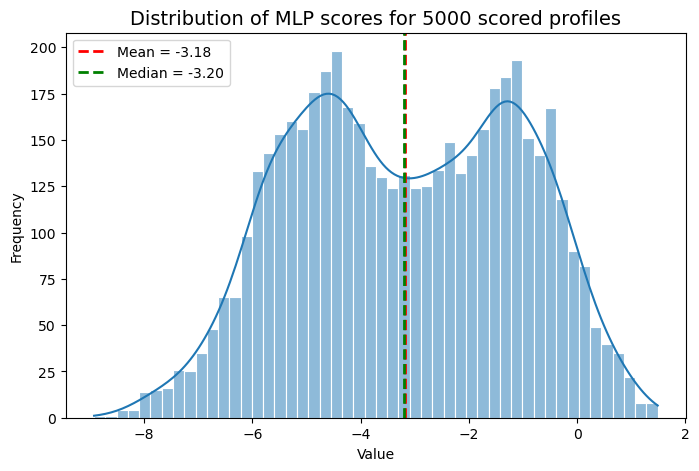

In [ ]:
distribution_of_scores(scored_sampled['MLP_score'], title="Distribution of MLP scores for 5000 scored profiles")

Mean: -3.17
Median: -3.23
Std: 2.01
Variance: 4.02


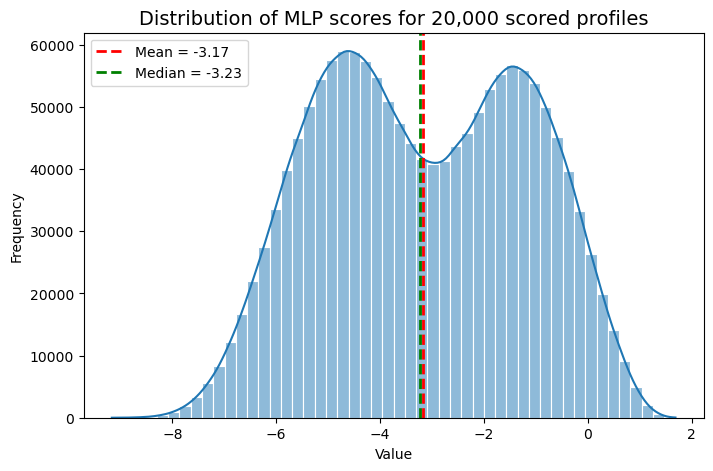

In [ ]:
distribution_of_scores(profiles['MLP_score'], title="Distribution of MLP scores for 20,000 scored profiles")

# Comparing direct and indirect (reverse engineer) prompt responses
1. Top 100 (ranked by MLP_score) profiles
2. Randomly sampled 500 profiles
3. Uniformly sampled 500 profiles
4. Resampled 5000 profiles

## top 100 profiles

In [ ]:
top100_profiles = scored_profiles[:100]

In [ ]:
for real_profile_id in real_profiles['profile_id']:
    if real_profile_id.startswith('iPhone 17'):
        continue
    df = pd.read_csv(f"../output/{real_profile_id}_ntop100.csv")
    print(f"{real_profile_id} & {np.sum(df['chosen_id']!=real_profile_id)+1}/101", end='')
    for score_type in score_types:
        real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
        top100_score = top100_profiles[score_type].values
        rank = np.sum(top100_score>real_score)+1
        print(f" & {rank}/101", end='')
    print(' \\\\')

iPhone 16 & 23/101 & 13/101 & 10/101 & 15/101 \\
iPhone 16 Plus & 19/101 & 58/101 & 16/101 & 56/101 \\
iPhone 16 Pro & 13/101 & 7/101 & 5/101 & 22/101 \\
iPhone 16 Pro Max & 21/101 & 38/101 & 40/101 & 71/101 \\


## resampled 500

In [ ]:
# ## combine result from all experiment batches (resampled 500)
# import shutil
# for real_profile_id in real_profiles['profile_id']:
#     src_path1 = f"../output/{real_profile_id}_all_makeup_profiles.csv"
#     df1 = pd.read_csv(src_path1)
#     src_path2 = f"../output/{real_profile_id}_fixreal_200.csv"
#     df2 = pd.read_csv(src_path2)
#     # 目标文件夹路径
#     dst_path1 = f"../output/dir_output/{real_profile_id}_all_makeup_profiles.csv"
#     dst_path2 = f"../output/dir_output/{real_profile_id}_fixreal_200.csv"

#     shutil.move(src_path1, dst_path1)
#     shutil.move(src_path2, dst_path2)
#     df3 = pd.concat([df1, df2]).drop_duplicates(keep=False)
#     df3.to_csv(f"../output/{real_profile_id}_resampled500.csv", index=False)


In [46]:
resampled500_profile_ids = np.load("../data/resampled500_profile_ids.npy", allow_pickle=True)
resampled500_profiles = scored_profiles[scored_profiles['profile_id'].isin(resampled500_profile_ids)]

Mean: -3.16
Median: -3.20
Std: 2.01
Variance: 4.04


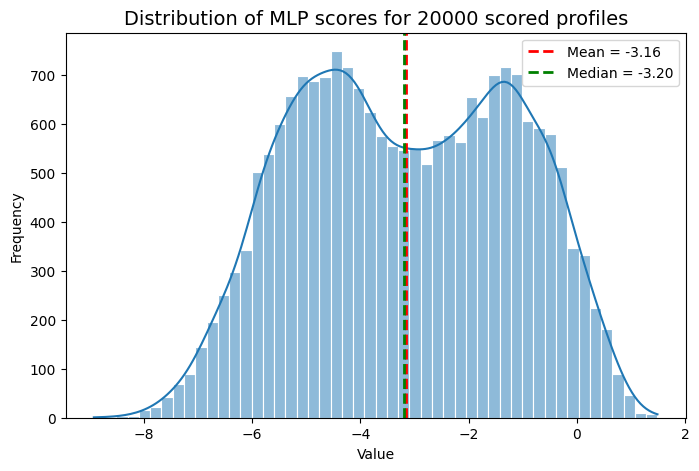

Mean: -3.19
Median: -3.28
Std: 2.05
Variance: 4.21


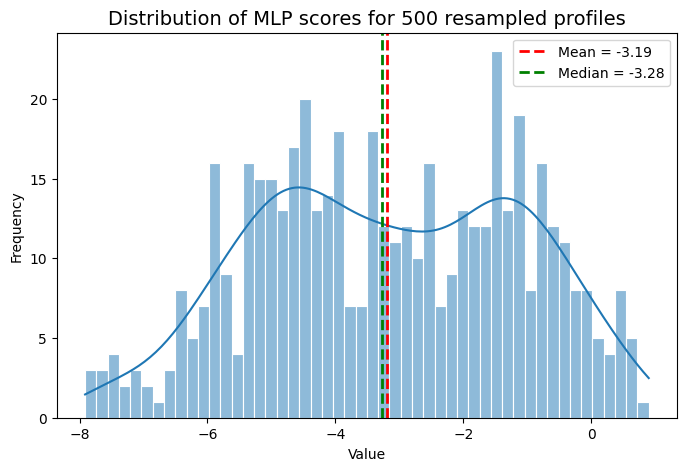

In [49]:
# draw the distribution of scores for 20000 scored profiles and 500 resampled profiles
distribution_of_scores(scored_profiles['MLP_score'].values, title="Distribution of MLP scores for 20000 scored profiles")
distribution_of_scores(resampled500_profiles['MLP_score'].values, title="Distribution of MLP scores for 500 resampled profiles")

In [86]:
for real_profile_id in real_profiles['profile_id']:
    df = pd.read_csv(f"../output/{real_profile_id}_resampled500.csv")
    print(f"{real_profile_id} & {np.sum(df['chosen_id']!=real_profile_id)+1}/500", end='')
    for score_type in score_types:
        real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
        resampled500_scores = resampled500_profiles[score_type].values
        rank = np.sum(resampled500_scores>real_score)+1
        print(f" & {rank}/500", end='')
    print(' \\\\')

iPhone 16 & 4/500 & 1/500 & 1/500 & 10/500 \\
iPhone 16 Plus & 2/500 & 2/500 & 1/500 & 43/500 \\
iPhone 16 Pro & 2/500 & 1/500 & 1/500 & 14/500 \\
iPhone 16 Pro Max & 6/500 & 1/500 & 1/500 & 61/500 \\
iPhone 17 & 11/500 & 6/500 & 1/500 & 31/500 \\
iPhone 17 Air & 283/500 & 315/500 & 298/500 & 327/500 \\
iPhone 17 Pro & 57/500 & 19/500 & 22/500 & 45/500 \\
iPhone 17 Pro Max & 102/500 & 29/500 & 69/500 & 106/500 \\


In [88]:
def logistic(x):
    if np.abs(x)<0.6:
        return 1 / (1 + 5*np.exp(-x))
    else:
        return x>0
logistic_fn = np.vectorize(logistic)
for real_profile_id in real_profiles['profile_id']:
    df = pd.read_csv(f"../output/{real_profile_id}_resampled500.csv")
    print(f"{real_profile_id} & {np.sum(df['chosen_id']!=real_profile_id)+1}/500", end='')
    for score_type in score_types:
        real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
        resampled500_scores = resampled500_profiles[score_type].values
        real_score = real_score+3.2
        resampled500_scores = resampled500_scores+3.2
        rank = int(np.sum(logistic_fn(resampled500_scores-real_score))+1)
        print(f" & {rank}/500", end='')
    print(' \\\\')

iPhone 16 & 4/500 & 1/500 & 3/500 & 9/500 \\
iPhone 16 Plus & 2/500 & 2/500 & 4/500 & 23/500 \\
iPhone 16 Pro & 2/500 & 1/500 & 1/500 & 12/500 \\
iPhone 16 Pro Max & 6/500 & 2/500 & 2/500 & 30/500 \\
iPhone 17 & 11/500 & 4/500 & 2/500 & 16/500 \\
iPhone 17 Air & 283/500 & 369/500 & 342/500 & 430/500 \\
iPhone 17 Pro & 57/500 & 44/500 & 47/500 & 23/500 \\
iPhone 17 Pro Max & 102/500 & 62/500 & 122/500 & 57/500 \\


# uniform 500

In [ ]:
# ## combine result from all experiment batches (resampled 500)
# import shutil
# for real_profile_id in real_profiles['profile_id']:
#     src_path1 = f"../output/{real_profile_id}_resampled500.csv"
#     df1 = pd.read_csv(src_path1)
#     src_path2 = f"../output/{real_profile_id}_fixreal_193.csv"
#     df2 = pd.read_csv(src_path2)
#     # 目标文件夹路径
#     dst_path1 = f"../output/dir_output/{real_profile_id}_resampled500.csv"
#     dst_path2 = f"../output/dir_output/{real_profile_id}_fixreal_193.csv"
#     shutil.move(src_path1, dst_path1)
#     shutil.move(src_path2, dst_path2)
#     df3 = pd.concat([df1, df2]).drop_duplicates(keep=False)
#     df3.to_csv(f"../output/{real_profile_id}_resample662.csv", index=False)


In [ ]:
uniformed_profile_ids = np.load("../data/uniform500_profile_ids.npy", allow_pickle=True)
uniformed_profiles = scored_profiles[scored_profiles['profile_id'].isin(uniformed_profile_ids)]
len(uniformed_profiles)

469

Mean: -3.15
Median: -3.15
Std: 2.02
Variance: 4.08


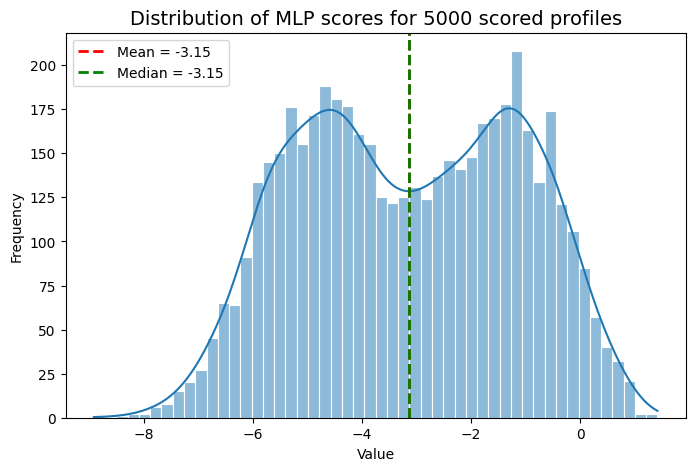

In [4]:
distribution_of_scores(scored_profiles['MLP_score'], title="Distribution of MLP scores for 5000 scored profiles")

Mean: -3.16
Median: -3.20
Std: 2.01
Variance: 4.04


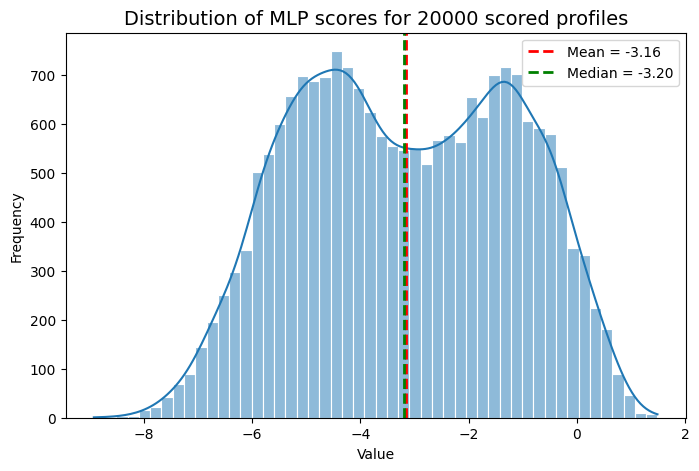

Mean: -3.48
Median: -3.48
Std: 2.83
Variance: 8.01


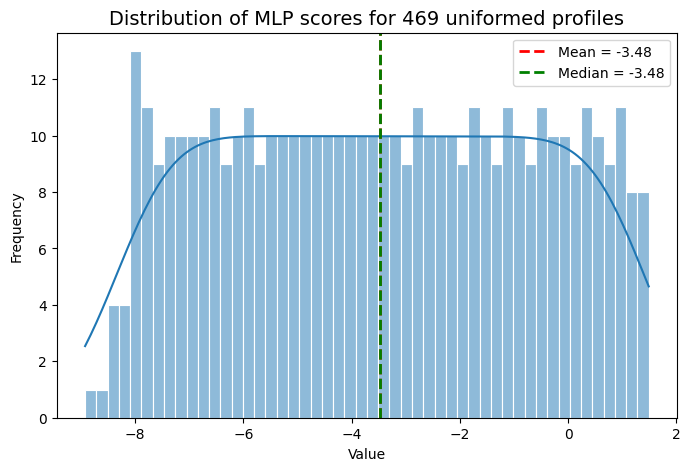

In [35]:
# draw the distribution of scores for 20000 scored profiles and 500 resampled profiles
distribution_of_scores(scored_profiles['MLP_score'].values, title="Distribution of MLP scores for 20000 scored profiles")
distribution_of_scores(uniformed_profiles['MLP_score'].values, title="Distribution of MLP scores for 469 uniformed profiles")

In [43]:
def logistic(x):
    if np.abs(x)<0.6:
        return 1 / (1 + 5*np.exp(-x))
    else:
        return x>0
logistic_fn = np.vectorize(logistic)
for real_profile_id in real_profiles['profile_id']:
    df = pd.read_csv(f"../output/{real_profile_id}_resample662.csv")
    df = df[df['profile_id'].isin(uniformed_profile_ids)]
    print(f"{real_profile_id} & {np.sum(df['chosen_id']!=real_profile_id)+1}/470", end='')
    for score_type in score_types:
        real_score = real_profiles[real_profiles['profile_id']==real_profile_id][score_type].values[0]
        uniformed_scores = uniformed_profiles[score_type].values
        rank = int(np.sum(logistic_fn(uniformed_scores-real_score))+1)
        print(f" & {rank}/470", end='')
    print(' \\\\')

iPhone 16 & 18/470 & 6/470 & 4/470 & 12/470 \\
iPhone 16 Plus & 11/470 & 55/470 & 6/470 & 28/470 \\
iPhone 16 Pro & 9/470 & 5/470 & 2/470 & 16/470 \\
iPhone 16 Pro Max & 19/470 & 9/470 & 13/470 & 37/470 \\
iPhone 17 & 29/470 & 70/470 & 11/470 & 22/470 \\
iPhone 17 Air & 250/470 & 296/470 & 281/470 & 343/470 \\
iPhone 17 Pro & 84/470 & 89/470 & 88/470 & 28/470 \\
iPhone 17 Pro Max & 114/470 & 100/470 & 136/470 & 66/470 \\


In [61]:
id1 = np.load("../data/resampled500_profile_ids.npy", allow_pickle=True)
id2 = np.load("../data/uniform500_profile_ids.npy", allow_pickle=True)
id3 = np.unique(np.concatenate((id1, id2)))
np.save("../data/fixreal_used_profile_ids.npy", id3)

In [60]:
for real_profile_id in real_profiles['profile_id']:
    df = pd.read_csv(f"../output/{real_profile_id}_resample662.csv")
    duplicates = df['profile_id'].value_counts()
    duplicates = duplicates[duplicates > 1].index
    df = df.drop_duplicates(subset='profile_id', keep='last')
    if len(df)==660:
        df.to_csv(f"../output/{real_profile_id}_resample662.csv", index=False)
    else:
        print(real_profile_id)